# Assignment #2 - Classification


<font color="blue"> Apnav Poptani</font>

# I. Introduction

In this assignment we will use the default of credit card clients Data Set to predict whether the user will pay credit card bills on time for next month. We will be using 4 approaches i.e.<br>
1.Pocket Algorithm.<br>
2.Quadratic Discriminant Analysis(QDA).<br>
3.Linear Discriminant Analysis(LDA).<br>
4.Linear Regression.<br>
Using these approaches we will classify the target value as the user will pay credit card bill next month on time or not. We will be comparing the accuracy and other metrics of training and testing data for all the 4 approaches.

# II. Data

## A.Description

The dataset used here for classification is default of credit card clients Data Set from Kaggle datasets. The dataset consists of 30000+ data samples and 24 feature values. The data here classifies default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.
<br>
LIMIT_BAL = Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
<br>
SEX = Gender (1 = male; 2 = female)
<br>
EDUCATION = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
<br>
MARRIAGE = Marital status (1 = married; 2 = single; 3 = others)
<br>
AGE = Age (year)
<br>
History of past payment (The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months ;4 = payment delay for four months; 5 = payment delay for five months;6 = payment delay for six months; 7 = payment delay for seven months;8 = payment delay for eight months; 9 = payment delay for nine months and above)
<br>
PAY_0 = the repayment status in September, 2005
<br>
PAY_2 = the repayment status in August, 2005
<br>
PAY_3 = the repayment status in July, 2005
<br>
PAY_4 = the repayment status in June, 2005
<br>
PAY_5 = the repayment status in May, 2005
<br>
PAY_6 = the repayment status in April, 2005
<br>
Amount of bill statement (NT dollar)
<br>
BILL_AMT1 = amount of bill statement in September, 2005
<br>
BILL_AMT2 = amount of bill statement in August, 2005
<br>
BILL_AMT3 = amount of bill statement in July, 2005
<br>
BILL_AMT4 = amount of bill statement in June, 2005
<br>
BILL_AMT5 = amount of bill statement in May, 2005
<br>
BILL_AMT6 = amount of bill statement in April, 2005
<br>
Amount of previous payment (NT dollar)
<br>
PAY_AMT1 = amount paid in September, 2005
<br>
PAY_AMT2 = amount paid in August, 2005
<br>
PAY_AMT3 = amount paid in July, 2005
<br>
PAY_AMT4 = amount paid in June, 2005
<br>
PAY_AMT5 = amount paid in May, 2005
<br>
PAY_AMT6 = amount paid in April, 2005
<br>
default payment next month (Yes = 1, No = 0)



### Reading the Data

Reading the .csv file for processing the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset=pd.read_excel('default of credit card clients.xls')

## B.Plots for Understanding or Analysis

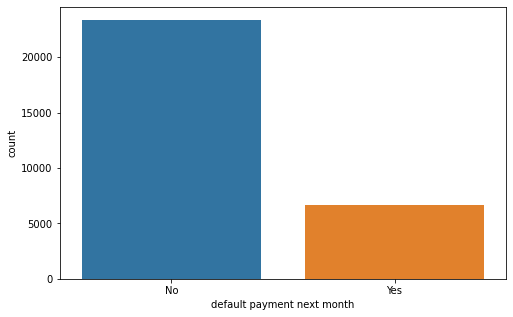

In [2]:
plt.rcParams["figure.figsize"] = (8,5)
sns.countplot(dataset['default payment next month'],label="Count").set_xticklabels(["No", "Yes"])
plt.show()

#### <div align="center"> Fig 1. Ratio of default payment next month </div>

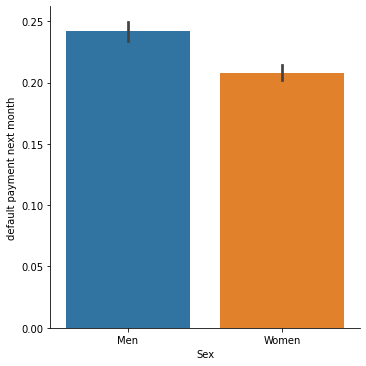

In [3]:
sns.catplot(x='SEX',y='default payment next month',data=dataset,kind='bar'
).set_axis_labels("Sex","default payment next month").set_xticklabels(["Men", "Women"])
plt.show()

#### <div align="center"> Fig 2. Sex vs default payment next month </div>

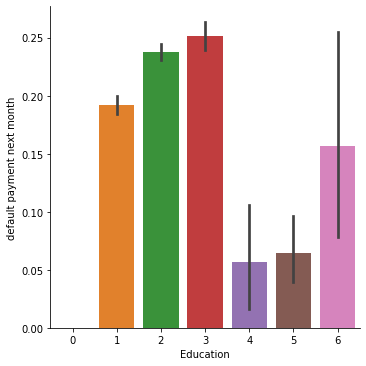

In [4]:
sns.catplot(x='EDUCATION',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Education","default payment next month")
plt.show()

#### <div align="center"> Fig 3. Education vs default payment next month</div>

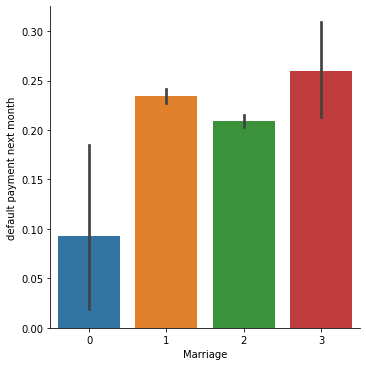

In [5]:
sns.catplot(x='MARRIAGE',y='default payment next month',data=dataset,kind='bar').set_axis_labels("Marriage","default payment next month")
plt.show()

#### <div align="center"> Fig 4.Marriage vs default payment next month</div>

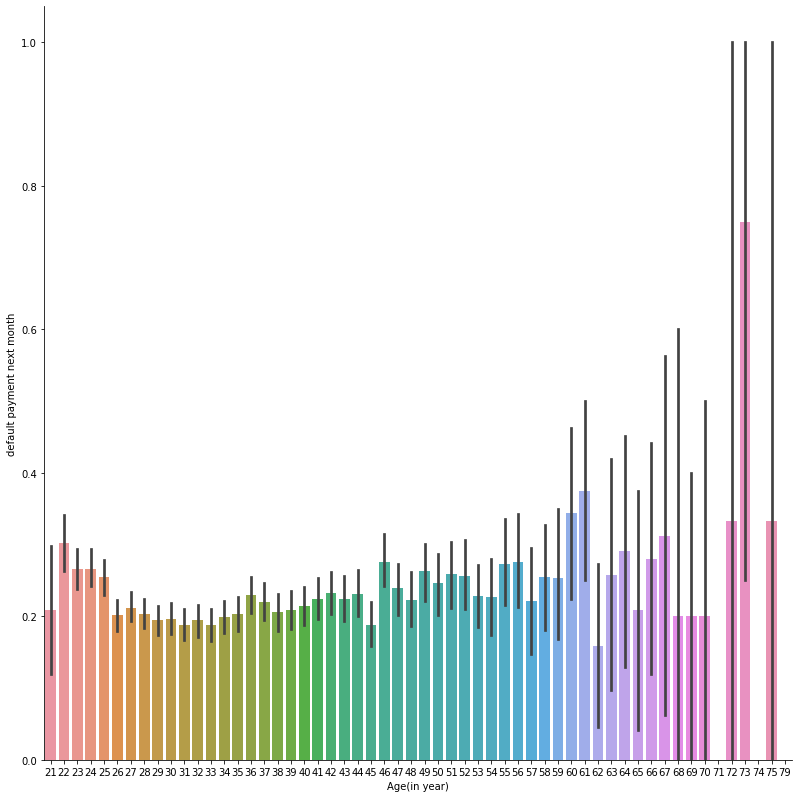

In [6]:
sns.catplot(x='AGE',y='default payment next month',data=dataset,kind='bar',height=11).set_axis_labels("Age(in year)","default payment next month")
plt.show()

#### <div align="center"> Fig 5. Age vs default payment next month</div>

## C.Preliminary Observation

The Plots above show us that:

<b>Fig1:</b> This graph shows gender ratio with respect to default payment next month. It can be clearly seen that the graph for less number of users will be paying credit card payments on time.<br>

<b>Fig2:</b> This catplot shows the Gender ratio with default payment method. It can be seen that males have higher on-time payment ratio to females.<br>

<b>Fig3:</b>This catplot shows the effect of education on default payment next month, as it can be seen that with increase in education the default payment next month probability of the user also increases.<br>

<b>Fig4:</b>This catplot shows the effect of marital status of an adult on his/her default payment next month,here it can be seen that adults who are married have greater probability of default payment next month.<br>

<b>Fig5:</b>This catplot shows the effect of age of an adult on his/her default payment next month,here it can be seen that adults who are above age of 60 have greater probability of default payment next month with slight variance.<br>


# III. Method

### Summary for Different Models
<br><br>

### Pocket Algorithm:

Perceptron is a linear classifier i.e an algorithm that makes its predictions based on the linear predictor function combining a set of weights with the feature vector. If the training set is linearly separable, then the perceptron is guaranteed to converge. When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. The pocket algorithm is a variant of perceptron algorithm which solves the stability problem of the latter by keeping the best solution seen so far in its "pocket".<br>
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$
where $\alpha$ is learning rate.<br>


<br><br>
### QDA:

Discriminant analysis is used to determine which variables discriminate between two or more naturally occurring groups. The QDA performs a quadratic discriminant analysis (QDA),where it is assumed that the measurements from each class are normally distributed. In QDA there is no assumption that the covariance of each of the classes is identical.
Lets take a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid x)$ for the sample $x$ with the positive label. Thus, 

$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$
We can define the discriminant function $\delta_k(x)$ as

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic.


<br><br>
### LDA:

LDA is also closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data.LDA explicitly attempts to model the difference between the classes of data.Maintaining the covariance matrix is not cheap.
Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$


<br><br>
### Logistic Regression:

Logistic regression is a statistical model. Logistic regression is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".
We can consider a linear regression model that directly predicts $P(T=k \mid x)$, not the class label $k$. 
Again, let us use the same linear model for regression: 

$$
\kappa = f(x ; w) = X w.
$$

Since $P(T=k \mid x)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

Taking the softmax function and taking the derivative.
Using the gradient, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$

<br><br>


### A. Super Classs Definition


In [7]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### Explanation of Code

Here BaseModel class has two abstract methods train() and use(),when implementing this class we have to provide a defination for the two abstract methods. Classifier class futher extends the BaseModel class with the abstract functions,Classifier class provides three methods: normalize() which will standardize the input by subtracting the mean and dividing the standard deviation, _check_matrix() method will check if the passed matrix is 2D or not and add_ones method here adds a column or horizontal stack of ones to the input matrix as a bias.

### B. Pocket Algorithm


In [8]:
from copy import deepcopy as copy 

class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=10
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        X=np.asarray(X)
        T=np.asarray(T)
        T=self.normalize(T)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
#                 import pdb;pdb.set_trace()
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

### Explaination of Code

Here Pocket Class inherits the Classifier class hence we have to give the implementation of the two abstract methods train() and use().It also has a method compare() with four parameters which is used to compare the weights.<br>
The train() method is used to train the data where we initialized the weights to zero and copied it to w_pocket which will store the best result, it also has maxiter which is the maximum number of iterations and alpha which is the learning rate.<br>
The use() method will use the test data to predict the target value.

### C. QDA

In [9]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
            
    @staticmethod    
    def QDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(prior)
    
    
    def train(self,X_train,t):
        
        X1=dataset[dataset['default payment next month'] == -1.0]
        X1=X1.drop(['default payment next month'],axis=1)
        X2=dataset[dataset['default payment next month'] == 1.0]
        X2=X2.drop(['default payment next month'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDA(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDA(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

### Explanation of Code

Here QDA1 class inherits the Classifier class along with the abstract functions train() and use().We have QDA function which returns the discriminant value.<br>
The train() method has input as the train and test data as X and T respectively. We are taking the rows that have 0 as value in target column in X1 and similarly taking rows which have target value as 1 in X2, using which we calulate the mu1 and mu2 as mean of the train data and sigma1 and sigma2 as covariance of the train data, after which we will calculate the probability by taking number of rows of X1 and X2 in N1 and N2 respectively and find the two probabilities p1 and p2.
The use() method will use the test data to return the prediction  and d1 and d2 which we will check for greater value and assign 1 and 0 to it.

### D. LDA

In [10]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDA(X, mu, sigma, prior):
        s_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, s_inv) * mu \
                - 0.5 * np.dot(mu, s_inv) * mu \
                + np.log(prior), axis=1)
    
    def train(self,X_train,t):
        X1=dataset[dataset['default payment next month'] == -1.0]
        X1=X1.drop(['default payment next month'],axis=1)
        X2=dataset[dataset['default payment next month'] == 1.0]
        X2=X2.drop(['default payment next month'],axis=1)
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))     
        
        self.Sigma = np.cov(X_train.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDA(X,self.mu1,self.Sigma,self.p1),self.LDA(X,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,-1)
        return pred,self.d1,self.d2

### Explanation of Code

Here LDA1 class inherits Classifier class with its two abstarct methods train() and use(). We have LDA method here which will return the discriminant value.<br>
The train() method here takes two inputs the train data and the target values as X_train and T respectively. We are taking the rows that have 0 as value in target column in X1 and similarly taking rows which have target value as 1 in X2,using which we will calulate mu1,mu2 and sigma by taking the mean and covariance of train data,after which we will calculate the probability by taking number of rows of X1 and X2 in N1 and N2 respectively and find the two probabilities p1 and p2.<br>
The use() method will take input as train data we normalize it and pass it to LDA method along with mu1 and sigma values which will give us d1 and d2. We will return the predicted values in this method along with d1 and d2.



### E. Logistic Regression

In [11]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### Explanation of Code

Here Logistic class inherits Classifier parent class along with its two abstract method train() and use() also, we also have two other methods softmax() method which gives us the sigmoid function while in other method g() we call the softmax function to  return the sigmoid with input as train data.<br>
The train() method has niter which is the number of iterations,in this method we will check the target values and likely transform the T input into two columns having values 0 at column one and 1 at column two if the target value is 0,and vice versa if the target value is 1.<br>
The use() method will normalize the input and return the sigmoid by passing the input train data and weights to it.<br>

<b>Importing the dataset and partitioning it.</b>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
dataset=pd.read_excel('default of credit card clients.xls')
dataset['default payment next month'].replace({0:-1},inplace = True)
dataset1=dataset.loc[:]

Here we will import the dataset and make a copy to make the necessary changes.

In [33]:
def split(dataset ,size=0.5):
    train_idx = dataset.sample(int(dataset.shape[0]*size)).index
    train_dataset = dataset.loc[train_idx]
    test_dataset = dataset.drop(train_idx)
    cols_drop= ['ID', 'MARRIAGE', 'AGE','PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']
    return train_dataset.drop(cols_drop , axis=1) ,test_dataset.drop(cols_drop , axis=1),train_dataset["default payment next month"],test_dataset["default payment next month"]

Here we have partitioned the data set into train and testing for both train and target values variables declared above. For simpler execution of pocket algorithm, running the algorithm with 6 values.

# IV. Experiments

## Evaluation and Plots for Results

## 1.Pocket Algorithm

In [34]:
X_train,X_test,y_train,y_test= split(dataset1 , 0.80)

In [35]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [36]:
p=Pocket()
p.train(X_train,y_train)

[0. 0. 0. 0. 0. 0.]
End of training:  9
[ 0.00915679 -0.01071402 -0.01875131  0.07107347  0.01280592 -0.0223394 ]


In [37]:
ypred_train=p.use(X_train)
ypred_test=p.use(X_test)

## Accuracy & F1 on train data

In [38]:
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 0.5960833333333333
F1 score: 0.40687714145863924


## Accuracy & F1 on test data

In [39]:
print('Accuracy:', accuracy_score(y_test,ypred_test))
print('F1 score:', f1_score(y_test,ypred_test))

Accuracy: 0.603
F1 score: 0.40922619047619047


In [40]:
cf=confusion_matrix(y_test, ypred_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

cf1=confusion_matrix(y_train, ypred_train)
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]
precision=(TP/(TP+FP))
print('Precision:' ,precision)

Precision: 0.30161465892597966


In [41]:
recall=TP/(TP+FN)
print('Recall:',recall)

Recall: 0.625


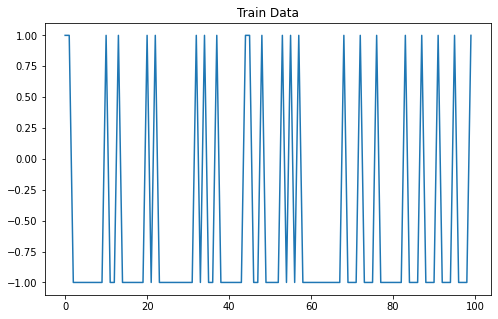

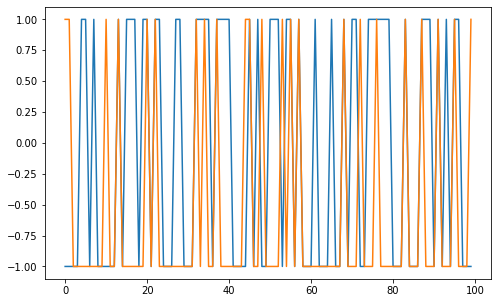

In [42]:
plt.title("Train Data")
plt.plot(y_train[0:100])
plt.show()
plt.plot(ypred_train[0:100])
plt.plot(y_train[0:100])
plt.show()

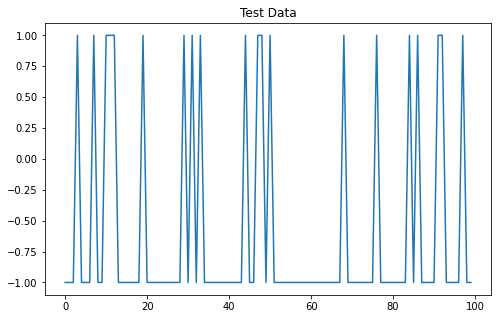

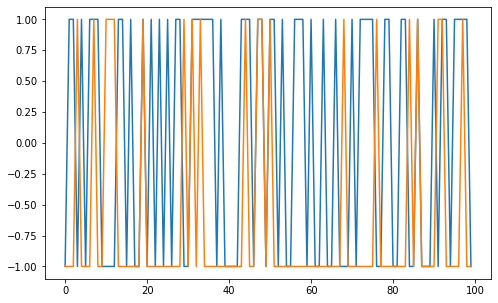

In [43]:
plt.title("Test Data")
plt.plot(y_test[0:100])
plt.show()
plt.plot(ypred_test[0:100])
plt.plot(y_test[0:100])
plt.show()

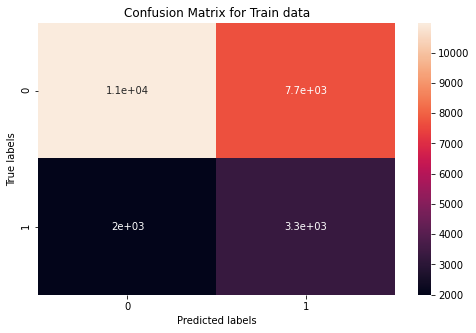

In [44]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 
plt.title("Train Data")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Train data');

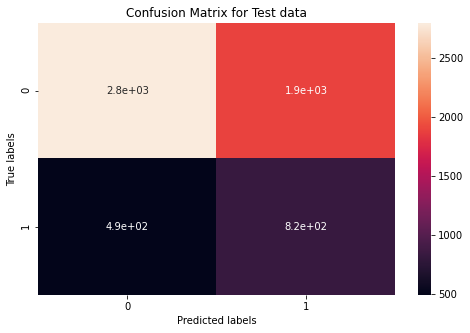

In [45]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Test data');

In [55]:
def split(dataset ,size=0.5):
    train_idx = dataset.sample(int(dataset.shape[0]*size)).index
    train_dataset = dataset.loc[train_idx]
    test_dataset = dataset.drop(train_idx)
    cols_drop= ['default payment next month']
    return train_dataset.drop(cols_drop , axis=1) ,test_dataset.drop(cols_drop , axis=1),train_dataset["default payment next month"],test_dataset["default payment next month"]

## 2.QDA

In [56]:
X_train,X_test,y_train,y_test= split(dataset , 0.80)

In [57]:
# Training
q=QDA1()
q.train(X_train,y_train)

In [58]:
qda_train,d1,d2=q.use(X_train)

In [59]:
qda_test,d1,d2=q.use(X_test)

## Accuracy and F1 on Train Data

In [60]:
print('Accuracy:', accuracy_score(y_train,qda_train))
print('F1 score:', f1_score(y_train,qda_train))

Accuracy: 0.23225
F1 score: 0.3658016107936945


## Accuracy and F1 on Test Data

In [61]:
print('Accuracy:', accuracy_score(y_test,qda_test))
print('F1 score:', f1_score(y_test,qda_test))

Accuracy: 0.22233333333333333
F1 score: 0.35338137472283815


In [710]:
cf2=confusion_matrix(y_test, qda_test)
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

cf3=confusion_matrix(y_train, qda_train)
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]
print('Precision:' ,(TP/(TP+FP)))

Precision: 0.22060498671054296


In [711]:
print('Recall:', TP/(TP+FN))

Recall: 0.9937286202964652


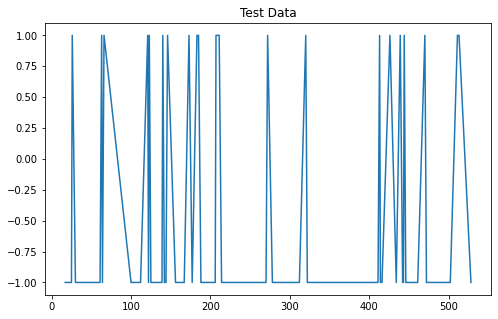

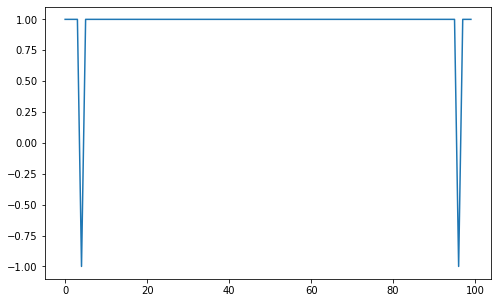

In [712]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title("Test Data")
plt.plot(y_test[0:100])
plt.show()
plt.plot(qda_test[0:100])
plt.show()

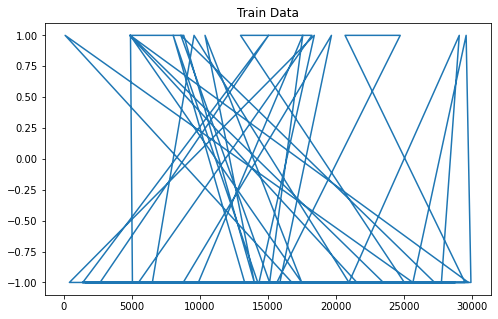

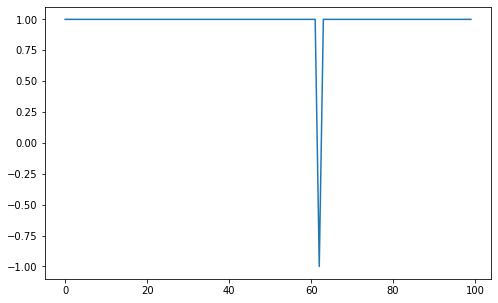

In [713]:
plt.title("Train Data")
plt.plot(y_train[0:100])
plt.show()
plt.plot(qda_train[0:100])
plt.show()

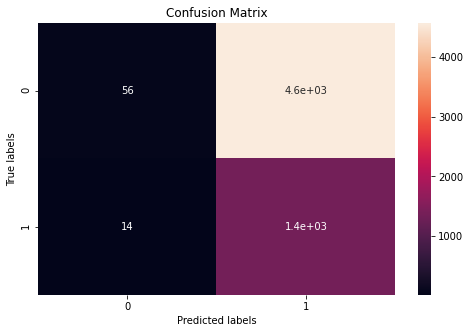

In [714]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'QDA Discriminant Functions')

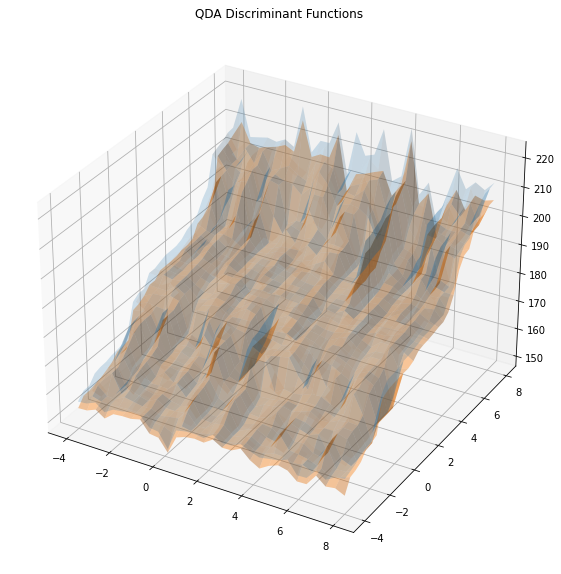

In [715]:
from mpl_toolkits.mplot3d import Axes3D
p,d10,d20 = q.use(X_test[:900])
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d10.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d20.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

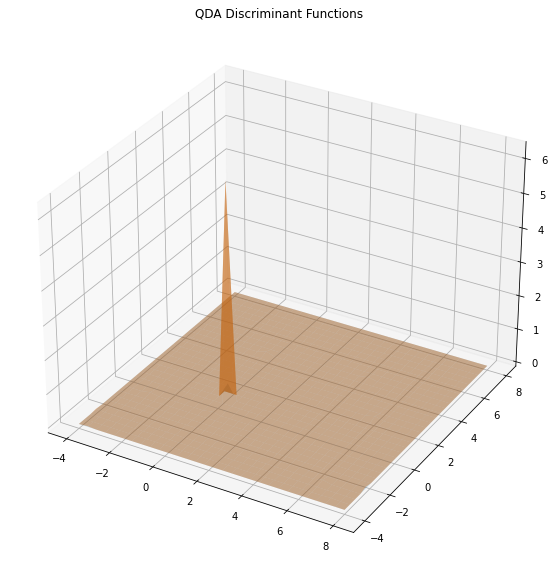

In [716]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
pr1 = np.exp( d10.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1))
pr2 = np.exp( d20.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, pr1, alpha=0.2)
ax.plot_surface(xs, ys, pr2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

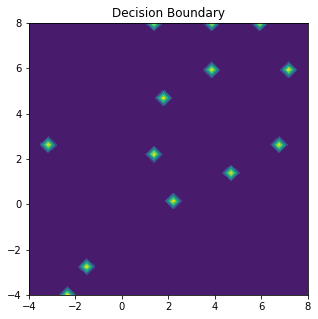

In [717]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d10-d20)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 3.LDA

In [67]:
X_train,X_test,y_train,y_test= split(dataset , 0.70)

In [68]:
l=LDA1()
l.train(X_train,y_train)

In [69]:
lda_train,d1,d2=l.use(X_train)

In [70]:
lda_test,d1,d2=l.use(X_test)

In [71]:
print('Accuracy:', accuracy_score(y_train,lda_train))
print('F1 score:', f1_score(y_train,lda_train))

Accuracy: 0.22066666666666668
F1 score: 0.3615510649918077


In [73]:
print('Accuracy:', accuracy_score(y_test,lda_test))
print('F1 score:', f1_score(y_test,lda_test))

Accuracy: 0.22244444444444444
F1 score: 0.3639338302126886


In [74]:
cf4=confusion_matrix(y_test, lda_test)
TP=cf4[1][1]
TN=cf4[0][0]
FN=cf4[1][0]
FP=cf4[0][1]

cf5=confusion_matrix(y_train, lda_train)
TP=cf5[1][1]
TN=cf5[0][0]
FN=cf5[1][0]
FP=cf5[0][1]
print('Precision:',(TP/(TP+FP)))

Precision: 0.22066666666666668


In [75]:
print('Recall:',TP/(TP+FN))

Recall: 1.0


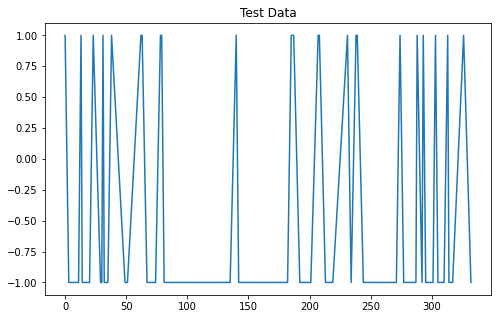

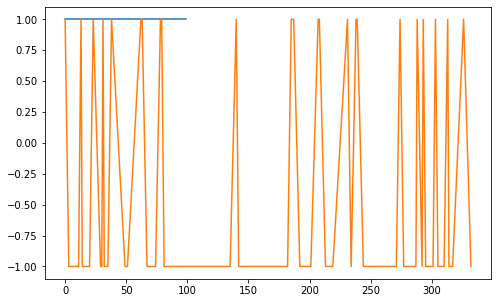

In [81]:
plt.title("Test Data")
plt.plot(y_test[0:100])
plt.show()
plt.plot(lda_test[0:100])
plt.plot(y_test[0:100])
plt.show()

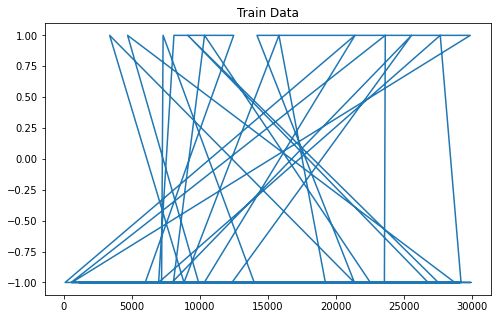

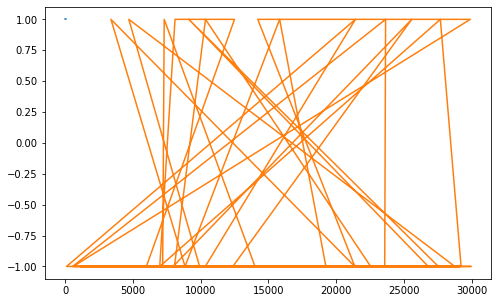

In [82]:
plt.title("Train Data")
plt.plot(y_train[0:100])
plt.show()
plt.plot(lda_train[0:100])
plt.plot(y_train[0:100])
plt.show()

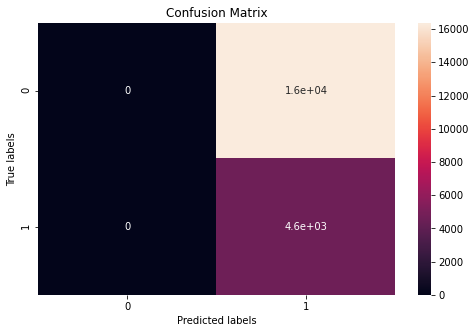

In [83]:
ax= plt.subplot()
sns.heatmap(cf5, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'LDA Discriminant Functions')

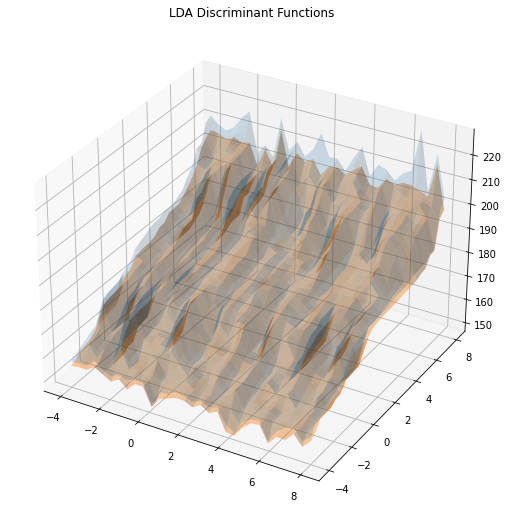

In [87]:
from mpl_toolkits.mplot3d import Axes3D
p,d10,d20 = q.use(X_test[:900])
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d10.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d20.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

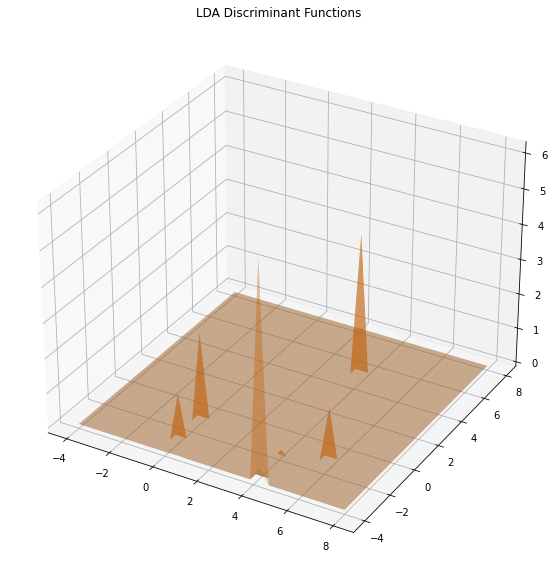

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
pr1 = np.exp( d10.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p1))
pr2 = np.exp( d20.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, pr1, alpha=0.2)
ax.plot_surface(xs, ys, pr2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

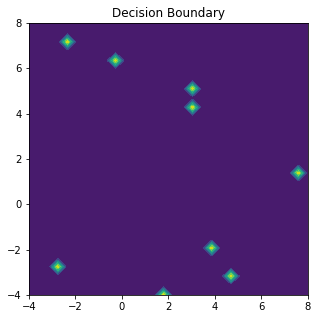

In [89]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d10-d20)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 4.Logistic Regression

In [91]:
XTrain, XTest, YTrain, YTest = split(dataset , 0.80)

In [92]:
lr = Logistic(0.0001)

In [93]:
lr.train(XTrain,np.array(YTrain))

#train data
ypred_lr_train = lr.use(XTrain)
ypred_lr_train = np.argmax(ypred_lr_train, 1)

y_train=np.array(YTrain)
y_train=np.where(YTrain==-1,0,1)

#test data
ypred_lr_test = lr.use(XTest)
ypred_lr_test = np.argmax(ypred_lr_test, 1)

y_test=np.array(YTest)
y_test=np.where(YTest==-1,0,1)


## Accuracy and F1 on Train Data

In [94]:
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.7190833333333333
F1 score: 0.1904418828049952


## Accuracy and F1 on Test Data

In [95]:
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7093333333333334
F1 score: 0.1895910780669145


In [105]:
cf6=confusion_matrix(y_test, ypred_lr_test)
TP=cf6[1][1]
TN=cf6[0][0]
FN=cf6[1][0]
FP=cf6[0][1]

cf7=confusion_matrix(y_train, ypred_lr_train)
TP=cf7[1][1]
TN=cf7[0][0]
FN=cf7[1][0]
FP=cf7[0][1]

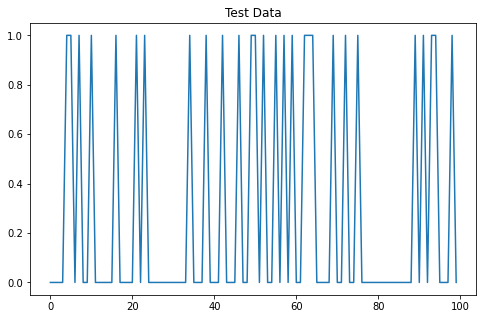

In [106]:
plt.title("Test Data")
# plt.plot(ytest[0:100])
# plt.show()
plt.plot(y_test[0:100])
plt.show()

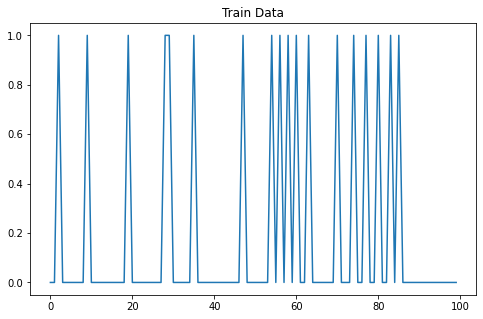

In [103]:
plt.title("Train Data")
# plt.plot(ytrain[0:100])
# plt.show()
plt.plot(y_train[0:100])
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

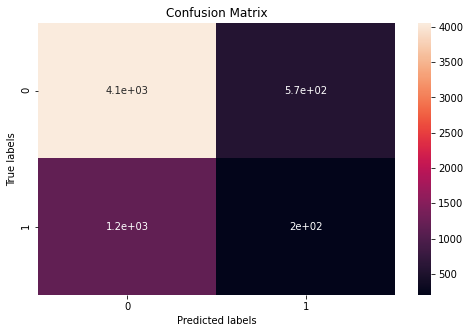

In [104]:
ax= plt.subplot()
sns.heatmap(cf6, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

## Discussion About Evaluation Metrics

Evaluating a model is critical for checking the models performance, hence there are a number of metrics for this purpose.

<b>Accuracy:</b> Accuracy is how close is the predicted value to the original value. Low accuracy causes a difference between result and true value.
<br><br>
<b>F1 Score:</b> F1 Score is the harmonic mean of precision and recall. It is a measure of a test's accuracy, F1 score reaches its best value at 1 and worst value at 0.
<br>
$ F1 = 2 \frac{precision . recall}{precision + recall}$
<br><br>
<b>Confusion Matrix:</b> Confusion matrix is a matrix of two columns and two rows that shows the number of true positive,true negative,false positive and false negative. This allows a more detailed analysis of correct classification. As accuracy is not a reliable metric of evaluation ,using the confusion matrix we can calculate precision, recall.
<br><br>
<b>Precision:</b> Precision gives the relevant values from the retrieved values.
<br>
$ Precision = \frac{TP}{TP+FP}$
<br><br>
<b>Recall:</b> Recall gives the total amount of relevant values actually retrieved.
<br>
$ Recall = \frac{TP}{TP+FN}$
<br><br>

## Discussion about Train and Test Accuracies

### Pocket Algorithm

For training data, results were:<br><br>

Accuracy: 0.5960833333333333<br>
F1 score: 0.40687714145863924
<br><br>

For testing data, results were: <br><br>

Accuracy: 0.603<br>
F1 score: 0.40922619047619047
<br><br>

The Precision and Recall for the data were:<br><br>
Precision: 0.30161465892597966<br>
Recall: 0.625

As pocket algorithm gave acuuracy of 59% on training data and 60% on testing data, This implies that the algorithm was able to learn more with training and testing as steps.<br><br>

### QDA

For training data, results were:<br><br>

Accuracy: 0.23225<br>
F1 score: 0.3658016107936945
<br><br>

For testing data, results were: <br><br>

Accuracy: 0.22233333333333333<br>
F1 score: 0.35338137472283815
<br><br>

The Precision and Recall for the data were:<br><br>
Precision: 0.22060498671054296<br>
Recall: 0.9937286202964652

As qda gave acuuracy of 23% on training data and  22% on testing data,it is almost same this shows that our model did not perform well on the given data as the accuracy did not improve significantly on the test data. The Recall of our model is 99% and the precision is 22%.<br><br>

### LDA

For training data,results were:<br><br>

Accuracy: 0.22066666666666668<br>
F1 score: 0.3615510649918077
<br><br>

For testing data, results were: <br><br>

Accuracy: 0.22244444444444444<br>
F1 score: 0.3639338302126886
<br><br>

The Precision and Recall for the data were:<br><br>
Precision: 0.22566666666666665<br>
Recall: 1.0

As lda gave acuuracy of 22% on training data and  22% on testing data,it is almost same this shows that our model did not perform well on the given data as the accuracy did not improve significantly on the test data.<br><br>

### Logistic Regression

For training data, results were:<br><br>

Accuracy: 0.797375<br>
F1 score: 0.2177899308348078
<br><br>

For testing data, results were: <br><br>

Accuracy: 0.7933333333333333<br>
F1 score: 0.24019607843137256
<br><br>

As logistic regression gave accuracy of 76% on training data and 79% on testing data,it is almost same this shows that our model works pretty well on both the train and test data.<br><br>

## Discussions about classificaion model comparison

Comparing all the algorithms we can see that the models performed well on the test data as well as the train data, we can say that it does not overfit or underfit the data as the accuracy is very low for QDA and LDA algorithms. The recall for pocket algorithm is 0.62 whih shows that pocket algorithm gives only 62% of correct predictions for user paying credit card bill on time for next month or not. We can see that Logistic Regression have the best accuracy and F1 scores as comparing with other algorithms. We also have the recall of LDA as 1 which confirms that the algorithms correctly predicted for user will be paying credit card bill on time for next month or not. Finally, out of the four algorithms logistic regression gave a good accuracy and F1 score on the data hence we can say that it predicted well on our data.

Pocket<br>
Accuracy:60<br>
F1:40%<br>

For Pocket Algorithm, The Accuracy we got is only 60% which does not allow us to use this model for predictions on this dataset

QDA<br>
Precision:22%<br>
Recall:99%<br><br>
LDA<br>
Precision:22%<br>
Recall:100%<br>

As in QDA and LDA we use discriminant values and for training in both algorithms the only difference is we use single sigma value for LDA, while in QDA we take the sigma values from two inputs of training data divided as taking to row with target value as zero in one variable and taking the target value as one in different variable.Hence, we can see that QDA and LDA gave us a similar result in precision and recall. The Accuracy of QDA algorithm is the lowest though it performed same on the training as well as the test data we got the accuracy only as 22%.



Logistic Regression<br>
Accuracy:79%<br>
F1:80%<br>

We can see that accuracy of Logistic Regression is greater than 70% which makes it ideal to be used for predicting that user will be paying his credit card bill on time or not.

# Conclusions

We have hence completed all four algorithms and successfully implemented them and also visualized all their results. I think Logistic Regression algorithm worked best for the dataset as it gave a stable accuracy and F1 score on both the training and the testing set, also the precision and recall values show that the algorithm works well and fits the data upto a good extent. The code for the algorithm helped me see how the algorithm works with the dataset as we also visualised the results it helped me understand the algorithms better. I also compared the algorithms using the metrics which showed how each algorithm performed with the data. The challenges faced was to search again for the dataset.

# References

[1] Yeh, I. C., & Lien, C. H., 'The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients' (2009), Expert Systems with Applications, 36(2), 2473-2480.<br>

[2] Professor Notes on classification.

# Extra Credit

* Working on[OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

In [741]:
dt100=dataset.iloc[:6000,:]
dt200=dataset.iloc[6000:12000,:]
dt300=dataset.iloc[12000:18000,:]
dt400=dataset.iloc[18000:24000,:]
dt500=dataset.iloc[24000:,:]

In [743]:
test1=dt100
train1=pd.concat([dt200,dt300,dt400,dt500])

test2=dt200
train2=pd.concat([dt100,dt300,dt400,dt500])

test3=dt300
train3=pd.concat([dt100,dt200,dt400,dt500])

test4=dt400
train4=pd.concat([dt100,dt200,dt300,dt500])

test5=dt500
train5=pd.concat([dt100,dt200,dt300,dt400])

## Pocket 

### Test 1

In [842]:
y_test=test2["default payment next month"]
y_train=train2["default payment next month"]
X_train=train2[['PAY_0','EDUCATION','AGE','SEX']]
X_test=test2[['PAY_0','EDUCATION','AGE','SEX']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [745]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0. 0. 0.]
End of training:  9
[ 3.07168873  0.15516444  0.85230423 -1.444495  ]


In [746]:
p=pk.use(X_test)

In [747]:
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.21883333333333332
F1 score: 0.35908655818405577


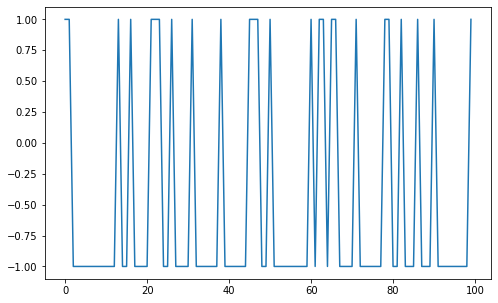

In [750]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [751]:
y_test=test2["default payment next month"]
y_train=train2["default payment next month"]
X_train=train2[['PAY_0','EDUCATION','AGE','SEX']]
X_test=test2[['PAY_0','EDUCATION','AGE','SEX']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [752]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0. 0. 0.]
End of training:  9
[ 3.23436051  0.07311967  0.85579511 -1.29826099]


In [753]:
p=pk.use(X_test)

In [754]:
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.23
F1 score: 0.3739837398373984


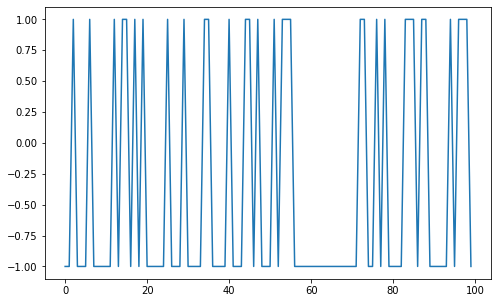

In [755]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [756]:
y_test=test3["default payment next month"]
y_train=train3["default payment next month"]
X_train=train3[['PAY_0','EDUCATION','AGE','SEX']]
X_test=test3[['PAY_0','EDUCATION','AGE','SEX']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [757]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0. 0. 0.]
End of training:  9
[ 3.08255837  0.12279079  0.88652663 -1.08666762]


In [758]:
p=pk.use(X_test)

In [759]:
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.24283333333333335
F1 score: 0.39077376961244464


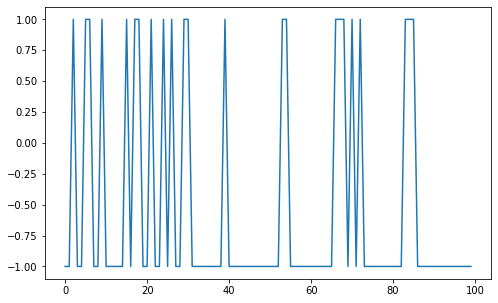

In [760]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [761]:
y_test=test4["default payment next month"]
y_train=train4["default payment next month"]
X_train=train4[['PAY_0','EDUCATION','AGE','SEX']]
X_test=test4[['PAY_0','EDUCATION','AGE','SEX']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [762]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0. 0. 0.]
End of training:  9
[ 3.2335727   0.04566761  0.68889747 -1.0616303 ]


In [763]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.20333333333333334
F1 score: 0.3379501385041551


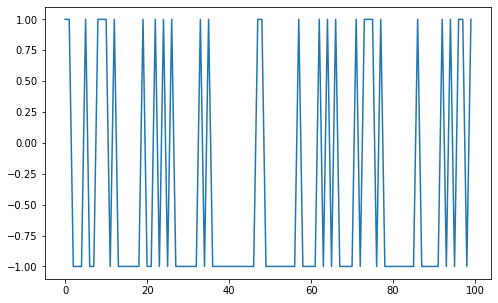

In [764]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [765]:
y_test=test5["default payment next month"]
y_train=train5["default payment next month"]
X_train=train5[['PAY_0','EDUCATION','AGE','SEX']]
X_test=test5[['PAY_0','EDUCATION','AGE','SEX']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [766]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0. 0. 0.]
End of training:  9
[ 3.08492527 -0.04232088  0.35218411 -1.14548317]


In [767]:
p=pk.use(X_test)

In [768]:
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.2115
F1 score: 0.34861627426683195


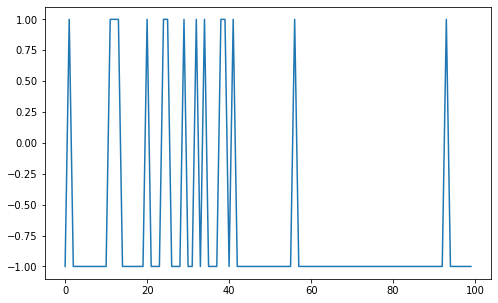

In [769]:
plt.plot(y_test[0:100])
plt.show()

It can be observed that all the test have almost the same accuracy for all the divided data.

## QDA

### Test 1

In [784]:
y_test=test1["default payment next month"]
y_train=train1["default payment next month"]
X_train=train1.drop("default payment next month", axis=1)
X_test=test1.drop("default payment next month", axis=1)

In [785]:
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)

In [786]:
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.22766666666666666
F1 score: 0.35941387890517007


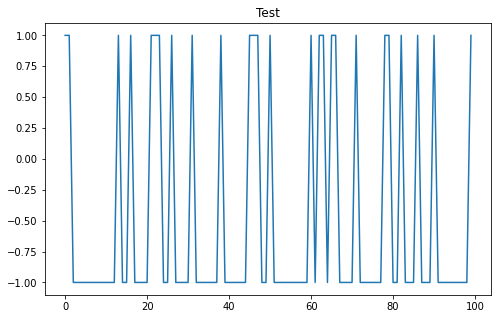

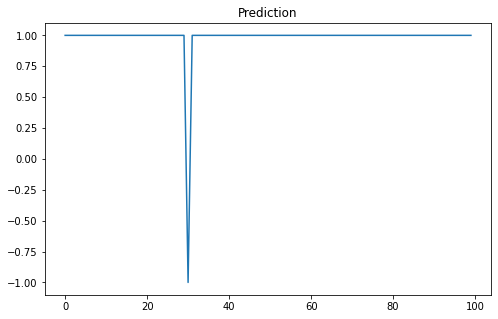

In [787]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 2

In [788]:
y_test=test2["default payment next month"]
y_train=train2["default payment next month"]
X_train=train2.drop("default payment next month", axis=1)
X_test=test2.drop("default payment next month", axis=1)

In [789]:
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)

In [790]:
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.24016666666666667
F1 score: 0.37539388957391423


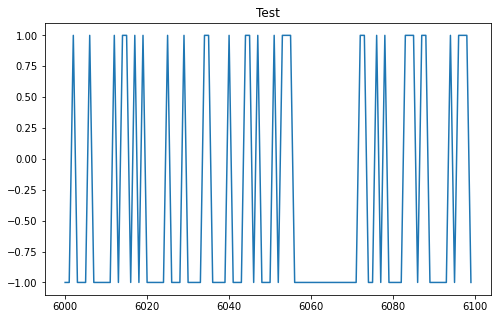

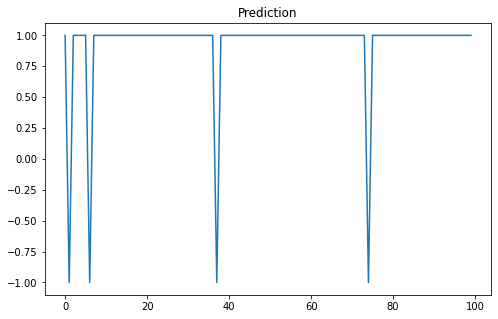

In [791]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 3

In [797]:
y_test=test3["default payment next month"]
y_train=train3["default payment next month"]
X_train=train3.drop("default payment next month", axis=1)
X_test=test3.drop("default payment next month", axis=1)

In [793]:
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)

In [794]:
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.25183333333333335
F1 score: 0.39148705435814013


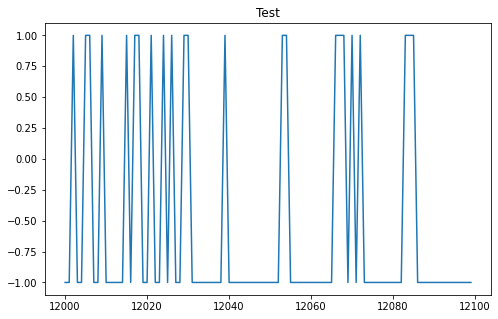

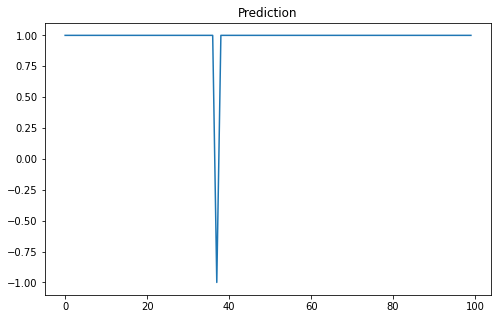

In [795]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 4

In [798]:
y_test=test4["default payment next month"]
y_train=train4["default payment next month"]
X_train=train4.drop("default payment next month", axis=1)
X_test=test4.drop("default payment next month", axis=1)

In [799]:
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)

In [800]:
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.21333333333333335
F1 score: 0.3396754336877448


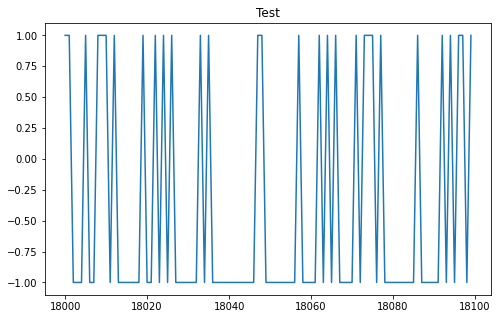

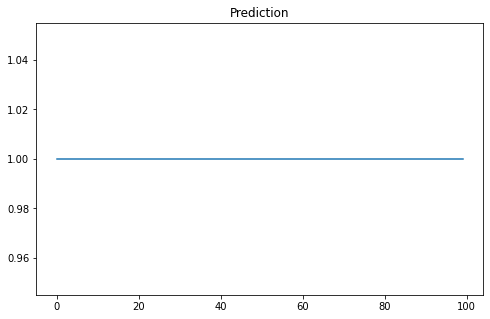

In [801]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 5

In [802]:
y_test=test5["default payment next month"]
y_train=train5["default payment next month"]
X_train=train5.drop("default payment next month", axis=1)
X_test=test5.drop("default payment next month", axis=1)

In [803]:
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)

In [804]:
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.219
F1 score: 0.35024958402662226


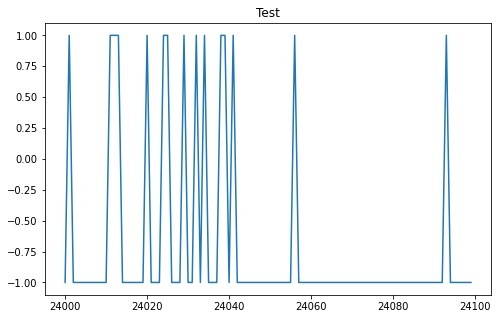

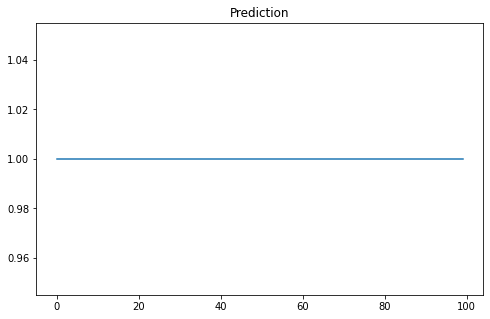

In [805]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

All the test have similar accuracy with test 5 being highest with small margin.

## LDA

### Test 1

In [806]:
y_test=test1["default payment next month"]
y_train=train1["default payment next month"]
X_train=train1.drop("default payment next month", axis=1)
X_test=test1.drop("default payment next month", axis=1)

In [807]:
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)

In [808]:
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.21883333333333332
F1 score: 0.35908655818405577


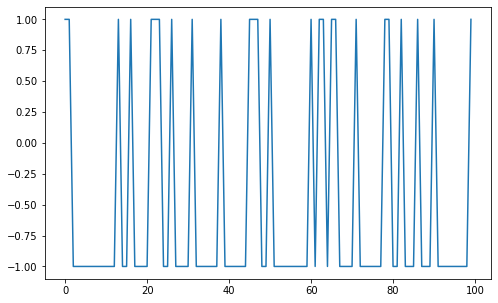

In [809]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [810]:
y_test=test2["default payment next month"]
y_train=train2["default payment next month"]
X_train=train2.drop("default payment next month", axis=1)
X_test=test2.drop("default payment next month", axis=1)

In [811]:
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)

In [812]:
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.23
F1 score: 0.3739837398373984


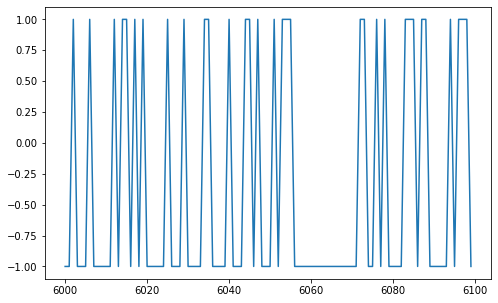

In [813]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [814]:
y_test=test3["default payment next month"]
y_train=train3["default payment next month"]
X_train=train3.drop("default payment next month", axis=1)
X_test=test3.drop("default payment next month", axis=1)

In [815]:
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)

In [816]:
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.24283333333333335
F1 score: 0.39077376961244464


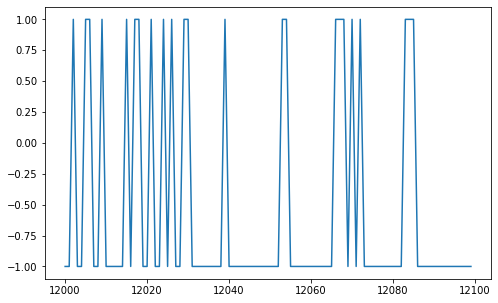

In [817]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [819]:
y_test=test4["default payment next month"]
y_train=train4["default payment next month"]
X_train=train4.drop("default payment next month", axis=1)
X_test=test4.drop("default payment next month", axis=1)

In [820]:
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)

In [821]:
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.20333333333333334
F1 score: 0.3379501385041551


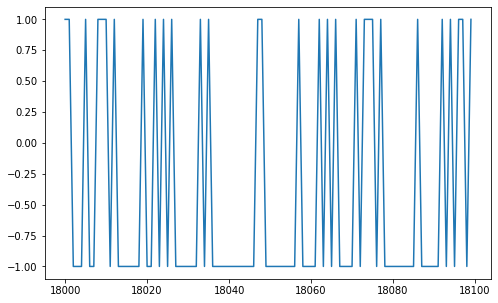

In [822]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [823]:
y_test=test5["default payment next month"]
y_train=train5["default payment next month"]
X_train=train5.drop("default payment next month", axis=1)
X_test=test5.drop("default payment next month", axis=1)

In [824]:
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)

In [825]:
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.211
F1 score: 0.34847233691164325


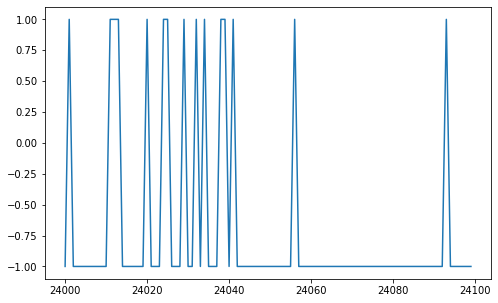

In [826]:
plt.plot(y_test[0:100])
plt.show()

The accuracy and F1 score of test vary a little bit compared to other algorithms with test 1 having highest accuracy 21% by slight margin.

## Logistic Regression

### Test 1

In [861]:
y_test=test1["default payment next month"]
y_train=train1["default payment next month"]
X_train=train1.drop("default payment next month", axis=1)
X_test=test1.drop("default payment next month", axis=1)

In [862]:
lr = Logistic(0.0001)
lr.train(X_train,np.array(y_train))
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
y_test=np.where(y_test==-1,0,1)

In [863]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.768
F1 score: 0.16245487364620936


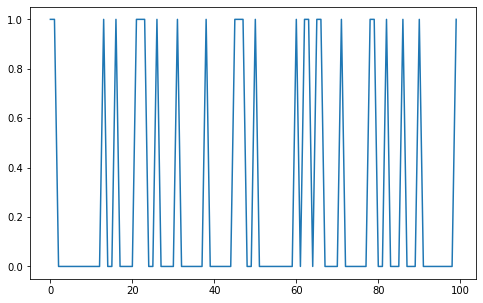

In [864]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [865]:
y_test=test2["default payment next month"]
y_train=train2["default payment next month"]
X_train=train2.drop("default payment next month", axis=1)
X_test=test2.drop("default payment next month", axis=1)

In [866]:
lr = Logistic(0.0001)
lr.train(X_train,np.array(y_train))
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
y_test=np.where(y_test==-1,0,1)

In [867]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.7418333333333333
F1 score: 0.155858310626703


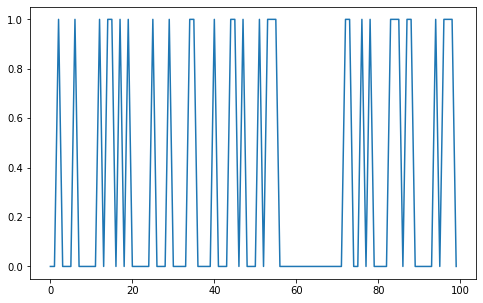

In [868]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [869]:
y_test=test3["default payment next month"]
y_train=train3["default payment next month"]
X_train=train3.drop("default payment next month", axis=1)
X_test=test3.drop("default payment next month", axis=1)

In [870]:
lr = Logistic(0.0001)
lr.train(X_train,np.array(y_train))
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
y_test=np.where(y_test==-1,0,1)

In [871]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.6931666666666667
F1 score: 0.20475161987041035


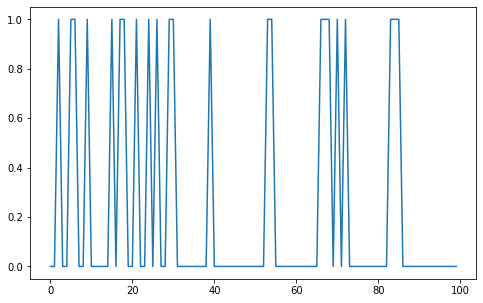

In [872]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [873]:
y_test=test4["default payment next month"]
y_train=train4["default payment next month"]
X_train=train4.drop("default payment next month", axis=1)
X_test=test4.drop("default payment next month", axis=1)

In [874]:
lr = Logistic(0.0001)
lr.train(X_train,np.array(y_train))
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
y_test=np.where(y_test==-1,0,1)

In [875]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.6866666666666666
F1 score: 0.18331885317115548


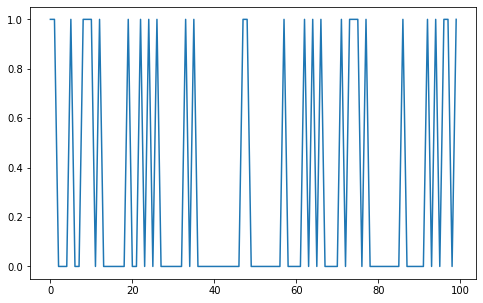

In [876]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [877]:
y_test=test5["default payment next month"]
y_train=train5["default payment next month"]
X_train=train5.drop("default payment next month", axis=1)
X_test=test5.drop("default payment next month", axis=1)

In [878]:
lr = Logistic(0.0001)
lr.train(X_train,np.array(y_train))
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
y_test=np.where(y_test==-1,0,1)

In [879]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.7325
F1 score: 0.16882444329363025


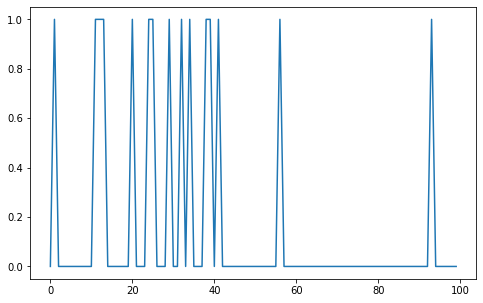

In [880]:
plt.plot(y_test[0:100])
plt.show()

All test have accuracy vary around 68% to 75% in different datasets.

#### Observation

We can see that all the algorithms perform similar even after dividing the dataset into 5 parts this shows that the dataset is pretty evenly distributed. We can see that Logistic regression give slight difference in their F1 score and accuracie as compared to other algorithms. So we can conclude that we can either partition the dataset or use it as a whole for implementing the algorithms it gives a similar performance on the dataset.